In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from label_flip_revised.utils import create_dir

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/diva_01


In [3]:
path_output = os.path.join(PATH_ROOT, 'results_plot')
print(path_output)
create_dir(path_output)

/home/lukec/workspace/diva_01/results_plot


In [4]:
df_falfa = pd.read_csv(os.path.join(PATH_ROOT, 'results', 'synth', 'synth_falfa_nn_db.csv'))
print(df_falfa.shape)
df_falfa.head()

(1350, 38)


,Data,F1,F1 SD,F1v,F2,F3,F4,N1,N2,N2 SD,...,Hubs SD,Path.Train,Path.Poison,Path.Test,Rate,Train.Clean,Test.Clean,Train.Poison,Test.Poison,Data.Base
0,Easy_f04_i04_r00_c01_w5_n1200_1_falfa_nn_0.00.csv,0.774583,0.263166,0.099270,0.225255,0.948958,0.857292,0.051042,0.235053,0.116335,...,0.219254,/home/lukec/workspace/diva_01/data/synth/train...,/home/lukec/workspace/diva_01/data/synth/falfa...,/home/lukec/workspace/diva_01/data/synth/test/...,0.00,0.967708,0.9875,0.967708,0.987500,Easy_f04_i04_r00_c01_w5_n1200_1
1,Easy_f04_i04_r00_c01_w5_n1200_1_falfa_nn_0.05.csv,0.835738,0.188710,0.226119,0.424998,0.950000,0.920833,0.100000,0.259626,0.128846,...,0.265631,/home/lukec/workspace/diva_01/data/synth/train...,/home/lukec/workspace/diva_01/data/synth/falfa...,/home/lukec/workspace/diva_01/data/synth/test/...,0.05,0.967708,0.9875,0.967708,0.954167,Easy_f04_i04_r00_c01_w5_n1200_1
2,Easy_f04_i04_r00_c01_w5_n1200_1_falfa_nn_0.10.csv,0.840295,0.188315,0.200345,0.333421,0.967708,0.917708,0.116667,0.286672,0.123068,...,0.216496,/home/lukec/workspace/diva_01/data/synth/train...,/home/lukec/workspace/diva_01/data/synth/falfa...,/home/lukec/workspace/diva_01/data/synth/test/...,0.10,0.967708,0.9875,0.877083,0.925000,Easy_f04_i04_r00_c01_w5_n1200_1
3,Easy_f04_i04_r00_c01_w5_n1200_1_falfa_nn_0.15.csv,0.823461,0.130795,0.260538,0.346614,0.953125,0.917708,0.120833,0.285096,0.130675,...,0.227990,/home/lukec/workspace/diva_01/data/synth/train...,/home/lukec/workspace/diva_01/data/synth/falfa...,/home/lukec/workspace/diva_01/data/synth/test/...,0.15,0.967708,0.9875,0.962500,0.837500,Easy_f04_i04_r00_c01_w5_n1200_1
4,Easy_f04_i04_r00_c01_w5_n1200_1_falfa_nn_0.20.csv,0.888253,0.126696,0.316706,0.256928,0.967708,0.882292,0.126042,0.296853,0.128195,...,0.211042,/home/lukec/workspace/diva_01/data/synth/train...,/home/lukec/workspace/diva_01/data/synth/falfa...,/home/lukec/workspace/diva_01/data/synth/test/...,0.20,0.967708,0.9875,0.939583,0.750000,Easy_f04_i04_r00_c01_w5_n1200_1


In [5]:
df_falfa.columns

Index(['Data', 'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 'N2', 'N2 SD',
       'N3', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 'L1', 'L2', 'L3',
       'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 'Hubs', 'Hubs SD',
       'Path.Train', 'Path.Poison', 'Path.Test', 'Rate', 'Train.Clean',
       'Test.Clean', 'Train.Poison', 'Test.Poison', 'Data.Base'],
      dtype='object')

In [6]:
cols_cm = [
    'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 'N2', 'N2 SD',
    'N3', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 'L1', 'L2', 'L3',
    'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 'Hubs', 'Hubs SD',
]
print(len(cols_cm))

28


In [7]:
def cor_at_rate(df, rate, x='Test.Poison', cols=cols_cm, eps=1e-4):
    df_ = df[(df['Rate'] >= rate - eps) & (df['Rate'] <= rate + eps)]
    print(df_.shape)
    df_cm = df_.loc[:, cols]
    df_cm['X'] = df_[x]
    cor = df_cm.corr()
    results = cor['X']
    return results

In [8]:
cor_0 = cor_at_rate(df_falfa, 0)
cor_0.to_csv(os.path.join(path_output, 'synth_corr_0.csv'))

idx = cor_0.abs().sort_values(ascending=False).keys()[1:]
cor_0[idx]

(150, 38)


N3        -0.963178
N1        -0.954069
N3 SD     -0.908885
F1v       -0.891468
L3        -0.882506
L2        -0.868164
ClsCoef   -0.789663
Density   -0.768821
L1        -0.746998
N2        -0.722053
F1 SD      0.700282
T3        -0.692897
LSC       -0.635341
F1        -0.634501
Hubs SD    0.634209
N2 SD      0.630651
T2        -0.590170
F3        -0.569391
F4        -0.497767
T1 SD      0.482276
T1         0.411417
Hubs      -0.394673
F2         0.320219
T4        -0.294923
N4 SD     -0.205963
N4        -0.080602
C2         0.052060
C1        -0.050701
Name: X, dtype: float64

In [9]:
RATE = 0.3
cor_1 = cor_at_rate(df_falfa, RATE)
cor_1.to_csv(os.path.join(path_output, f'synth_corr_{RATE*100:02.0f}.csv'))

(150, 38)


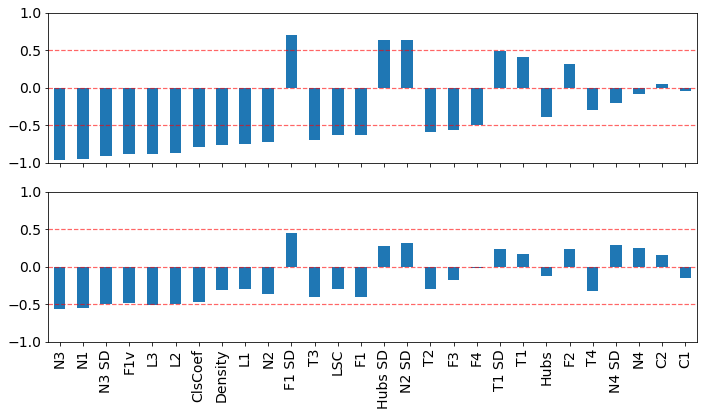

In [20]:
FIGSIZE = (10, 6)
FONTSIZE = 14

plt.rcParams["font.size"] = FONTSIZE
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=FIGSIZE)

cor_0[idx].plot.bar(ax=axs[0])
axs[0].set(ylim=[-1, 1], yticks=np.arange(-1, 1.1, 0.5))

cor_1[idx].plot.bar(ax=axs[1])
axs[1].set(ylim=[-1, 1], yticks=np.arange(-1, 1.1, 0.5))

for yy in [-0.5, 0, 0.5]:
    axs[0].axhline(y=yy, linewidth=1.2, color='r', alpha=0.6, linestyle='--')
    axs[1].axhline(y=yy, linewidth=1.2, color='r', alpha=0.6, linestyle='--')

axs[1].tick_params(axis="x", rotation=90)
plt.title('')
plt.tight_layout()

path_fig = os.path.join(path_output, 'synth_corr.pdf')
plt.savefig(path_fig, dpi=300)